# Synopsis

This code generates the Sam_X vs Sam_Z droplet scanning figure

## Initialize

In [1]:
import csv
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.ticker as tck
from sklearn import preprocessing

## Resize data

In [2]:
def resize_data(sam_x_z_list, pind4):

    new_sam = []
    new_pind4 = []

    for item in range(0,len(sam_x_z_list)-1,2):
        new_sam.append(sam_x_z_list[item])
        new_pind4.append(pind4[item]) 
    
    return new_sam, new_pind4


## Parse data file

In [3]:
def parse_data_file(filename, header_name, sam_x_z):
    h_name = ["#S", header_name]
    with open(filename, 'r') as infile:
        reader = csv.reader(infile, delimiter= " ")
        found_target_data = False
        found_section = False
        header1 = None 
        header2 =None
        sam_x_z_list = []
        pind4 = []
   
        
        for row in reader:
            if not found_target_data:
                if len(row) > 0 :
                    if row[0] == h_name[0] and row[1] == h_name[1]:
                        found_target_data = True
            else:
                if not found_section:
                    if len(row) > 0 :
                        if row[0] == "#L" and row[1] == sam_x_z:
                            header2 = next(reader)
                            found_section= True
                else:
                    if len(row) > 0 and row[0] != "#C":
                        sam_x_z_list.append(float(row[0]))
                        pind4.append(float(row[-1]))
                    else:
                        break
    x, y = resize_data(sam_x_z_list, pind4)                     
    return x, y


## Plot Sam_X vs Sam_Z figure

In [6]:

def plot_scan_data(filename, header_name, sam_x_z):
    scale = 1
    width = 3.5*scale
    font_size = 8*scale
    line_width = 0.5*scale
    marker_size = 4*scale
    tick_length_major = 4*scale
    tick_length_minor = 2*scale
    dim=1

    fig, (axt,axa) = plt.subplots(1, 2, figsize=(width, 0.8*width))
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams['axes.linewidth'] = line_width

    x_axis1, y_axis1 = parse_data_file(filename, header_name, sam_x_z)
    x_axis1 = [x - 7 for x in x_axis1]
    x_axis2, y_axis2 = parse_data_file(filename, "36", "samx")
    x_axis2 = [x + 7 for x in x_axis2]

    x_axis1 = np.array(x_axis1).reshape(-1,1)
    y_axis1 = np.array(y_axis1).reshape(-1,1)
    x_axis2 = np.array(x_axis2).reshape(-1,1)
    y_axis2 = np.array(y_axis2).reshape(-1,1)

    normalizedy_axis1 = [float(i)/max(y_axis1) for i in y_axis1]
    normalizedy_axis2 = [float(i)/max(y_axis2) for i in y_axis2]

    axa.errorbar(x_axis1, normalizedy_axis1,  color = 'tab:red' ,fmt = 'o', markersize=marker_size + 4, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')
    axa.plot(x_axis1[3:-3], normalizedy_axis1[3:-3], 'k-', markersize=marker_size , linewidth=1.2*line_width)
    axa.set_xlabel("Vertical (mm)", fontsize = font_size)
    axa.set_xlim(-2, 2)
    axa.set_xticks([-2,-1,0,1,2], fontsize = font_size) 
    axa.grid(color='k', linestyle=':', linewidth=line_width, alpha=0.1, which='both')
    axa.xaxis.set_minor_locator(tck.AutoMinorLocator())
    axa.tick_params('both', length=tick_length_major, width=line_width, which='major', labelsize=font_size)
    axa.tick_params('both', length=tick_length_minor, width=0.5*line_width, which='minor',
                labelleft=False, labelbottom=False)
    axa.tick_params(which='major' ,top=False, bottom=True, left=False, right=False,
                    labelleft=False, labelbottom=True)
 
    for axis in ['top','bottom','left','right']:
        axa.spines[axis].set_linewidth(line_width)


    axt.errorbar(x_axis2, normalizedy_axis2, color = 'tab:red' ,fmt = 'o', markersize=marker_size + 4, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')
    axt.plot(x_axis2[2:-2], normalizedy_axis2[2:-2], 'k-', markersize=marker_size , linewidth=1.2*line_width)
    axt.set_xlabel("Horizontal (mm)", fontsize = font_size)
    axt.set_ylabel('Transmission Coefficient (a.u.)',fontsize = font_size)

    
    axt.set_xlim(-2, 2)
    # axt.set_ylim(-0.1,1.1)
    axt.set_xticks([-2, -1 , 0, 1,2],fontsize = font_size) 
    axt.set_yticks([1,0.9,0.8,0.7,0.6,0.5,0.4], fontsize = font_size)

    
    axt.grid(color='k', linestyle=':', linewidth=line_width, alpha=0.1, which='both')
    axt.xaxis.set_minor_locator(tck.AutoMinorLocator())

    axt.tick_params('both', length=tick_length_major, width=line_width, which='major', labelsize=font_size)
    axt.tick_params('both', length=tick_length_minor, width=0.5*line_width, which='minor', bottom = True,
                labelleft=False, labelbottom=True)
    axt.tick_params(which='major' ,top=False, bottom=True, left=True, right=False,
                    labelleft=True, labelbottom=True)
 
    for axis in ['top','bottom','left','right']:
        axt.spines[axis].set_linewidth(line_width)

    plt.savefig('../Figures/plot_sam_x_z.pdf', dpi=600, format='pdf', 
            facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight')



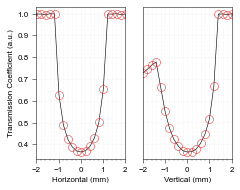

In [7]:
plot_scan_data("../Data/babnigg20220302.txt", "35", "samz")